<a href="https://colab.research.google.com/github/rhithikashinodpk/brainwaveintern/blob/main/fake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix




In [ ]:
# Load and label the datasets
df_fake = pd.read_csv('/content/Fake.csv')
df_fake['label'] = 0

df_real = pd.read_csv('/content/True.csv')
df_real['label'] = 1

# Combine both datasets
df = pd.concat([df_fake, df_real])

print("before cleaning:", df.shape)

before cleaning: (44898, 5)


In [ ]:
# Keep only text and label columns
df = df[['text', 'label']]
df.dropna(inplace=True)

print("after cleaning:", df.shape)
print(df['label'].value_counts())


after cleaning: (44898, 2)
label
0    23481
1    21417
Name: count, dtype: int64


In [ ]:
# Split features and labels
x = df['text']
y = df['label']


In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
x_tfidf = tfidf_vectorizer.fit_transform(x)


In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)


In [ ]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
y_pred = pac.predict(x_test)
score = accuracy_score(y_test, y_pred)

print(f"Accuracy: {round(score * 100, 2)}%")

Accuracy: 99.47%


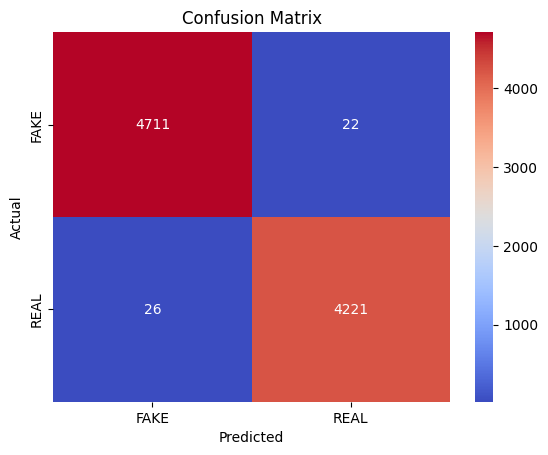

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
def predict_news_with_confidence(text):
    text_vector = tfidf_vectorizer.transform([text])
    prediction = pac.predict(text_vector)[0]
    confidence = pac.decision_function(text_vector)[0]
    label = "REAL" if prediction == 1 else "FAKE"
    return label, confidence

# Example usage
label, score = predict_news_with_confidence(sample)
print(f"Prediction: {label} (Confidence Score: {round(score, 2)})")


Prediction: FAKE (Confidence Score: -1.01)


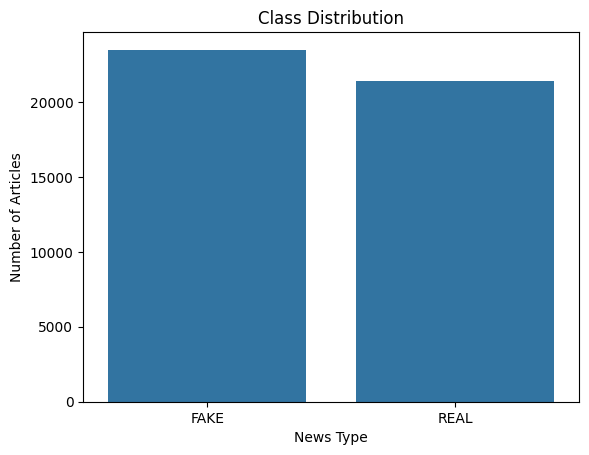

In [ ]:
sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['FAKE', 'REAL'])
plt.title("Class Distribution")
plt.xlabel("News Type" )
plt.ylabel("Number of Articles")
plt.show()